In [1]:
import os

#for converting lists into numpy arrays and to perform related operations on numpy arrays
import numpy as np

#for image loading and processing
import cv2
from PIL import Image

#for data/image visualization
import matplotlib.pyplot as plt

#for splitting dataset
from sklearn.model_selection import train_test_split

#for building and training a CNN model
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [6]:
os.listdir("/home/karthi_krish/ImageClassifier/asl-alphabet")
fpath = "/home/karthi_krish/ImageClassifier/asl-alphabet/asl_alphabet_train"
categories = os.listdir(fpath)
print("No. of categories of images in the train set = ",len(categories))

No. of categories of images in the train set =  29


In [7]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        n = 0
        for image_name in os.listdir(fpath+"/"+category):
            if n==100:
                break
            #load image data into an array
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            
            #data augmentation - resizing the image
            resized_img = img_array.resize((200, 200))
            
            #converting the image array to numpy array before appending it to the list
            img_lst.append(np.array(resized_img))
            
            #appending label
            labels.append(index)
            
            n+=1
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2900 
No. of labels loaded =  2900
<class 'list'> <class 'list'>


In [8]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2900, 200, 200, 3) 
Labels shape =  (2900,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


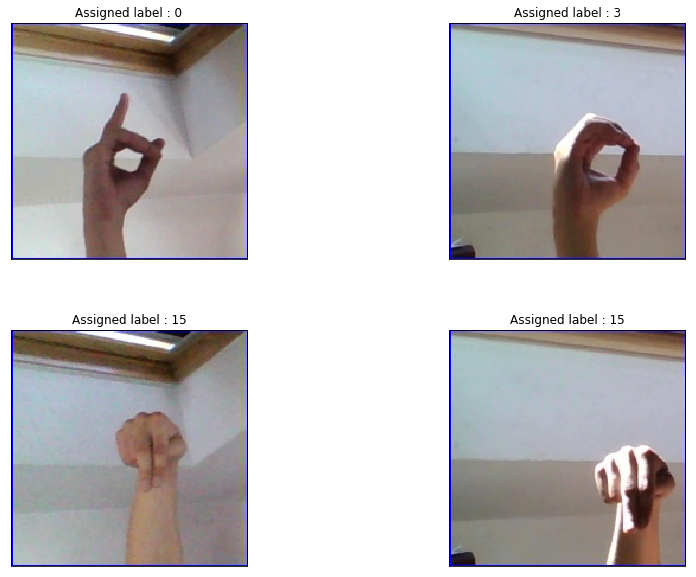

In [9]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (15 , 10))
    n = 0 
    for i in range(4):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(2, 2, n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
        plt.imshow(images[r[0]])
        
        plt.title('Assigned label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [10]:
#1-step in data shuffling
random_seed = 101

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 2897 2898 2899]

'n' values after shuffling =  [2492 2687 2875 ... 1361 1547  863]


In [11]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (2900, 200, 200, 3) 
Labels shape after shuffling =  (2900,)


In [12]:
#3-data normalization
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (2900, 200, 200, 3)


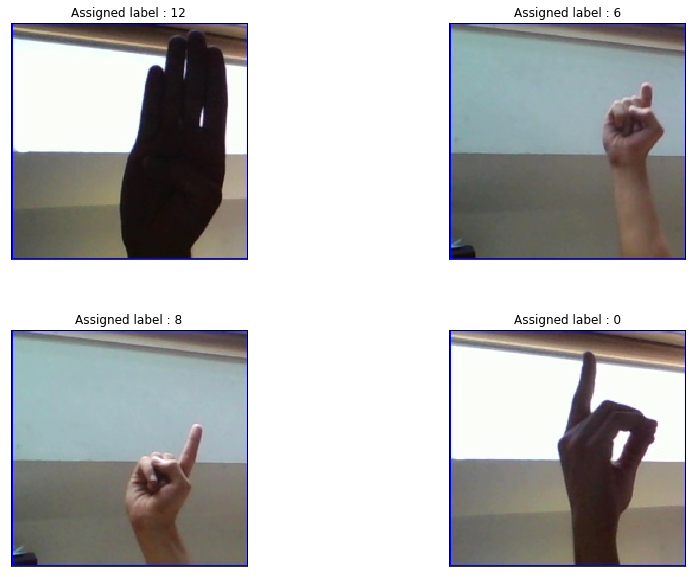

In [13]:
display_rand_images(images, labels)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)


x_train shape =  (2320, 200, 200, 3)
y_train shape =  (2320,)

x_test shape =  (580, 200, 200, 3)
y_test shape =  (580,)


In [15]:


model = Sequential()

#1 conv layer
model.add(Conv2D(filters = 16, kernel_size = 3, activation = "relu", input_shape = x_train.shape[1:]))

#1 max pool layer
model.add(MaxPooling2D(pool_size = 3))

#2 conv layer
model.add(Conv2D(filters = 32, kernel_size = 3, activation = "relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size = 3))

#3 conv layer
model.add(Conv2D(filters = 64, kernel_size = 3, activation = "relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size = 3))

model.add(BatchNormalization())

model.add(Flatten())

#1 dense layer
model.add(Dense(1000, input_shape = x_train.shape, activation = "relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(500, activation = "relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(29,activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 66, 66, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
__________

In [16]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [17]:
%%time
history = model.fit(x_train, y_train, epochs=100, batch_size = 100)

Epoch 1/100
2320/2320 [==============================] - 77s 33ms/step - loss: 3.6009 - acc: 0.1164
Epoch 2/100
2320/2320 [==============================] - 54s 23ms/step - loss: 2.7673 - acc: 0.2254
Epoch 3/100
2320/2320 [==============================] - 54s 23ms/step - loss: 2.3413 - acc: 0.3310
Epoch 4/100
2320/2320 [==============================] - 54s 23ms/step - loss: 1.9483 - acc: 0.4216
Epoch 5/100
2320/2320 [==============================] - 59s 25ms/step - loss: 1.6116 - acc: 0.5065
Epoch 6/100
2320/2320 [==============================] - 54s 23ms/step - loss: 1.2782 - acc: 0.6095
Epoch 7/100
2320/2320 [==============================] - 53s 23ms/step - loss: 1.0904 - acc: 0.6608
Epoch 8/100
2320/2320 [==============================] - 53s 23ms/step - loss: 0.8479 - acc: 0.7474
Epoch 9/100
2320/2320 [==============================] - 54s 23ms/step - loss: 0.7881 - acc: 0.7616
Epoch 10/100
2320/2320 [==============================] - 57s 25ms/step - loss: 0.6367 - acc: 0.8121

2320/2320 [==============================] - 61s 26ms/step - loss: 0.0314 - acc: 0.9909
Epoch 83/100
2320/2320 [==============================] - 62s 27ms/step - loss: 0.0190 - acc: 0.9935
Epoch 84/100
2320/2320 [==============================] - 64s 27ms/step - loss: 0.0393 - acc: 0.9905
Epoch 85/100
2320/2320 [==============================] - 65s 28ms/step - loss: 0.0506 - acc: 0.9841
Epoch 86/100
2320/2320 [==============================] - 62s 27ms/step - loss: 0.0577 - acc: 0.9810
Epoch 87/100
2320/2320 [==============================] - 61s 26ms/step - loss: 0.0426 - acc: 0.9892
Epoch 88/100
2320/2320 [==============================] - 61s 26ms/step - loss: 0.0412 - acc: 0.9875
Epoch 89/100
2320/2320 [==============================] - 61s 26ms/step - loss: 0.0293 - acc: 0.9931
Epoch 90/100
2320/2320 [==============================] - 63s 27ms/step - loss: 0.0228 - acc: 0.9922
Epoch 91/100
2320/2320 [==============================] - 66s 28ms/step - loss: 0.0272 - acc: 0.9914
Epo

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

580/580 [==============================] - 8s 14ms/step
Loss =  1.0021565922375384 
Accuracy =  0.7862068965517242


In [19]:
pred = model.predict(x_test)

pred.shape

(580, 29)

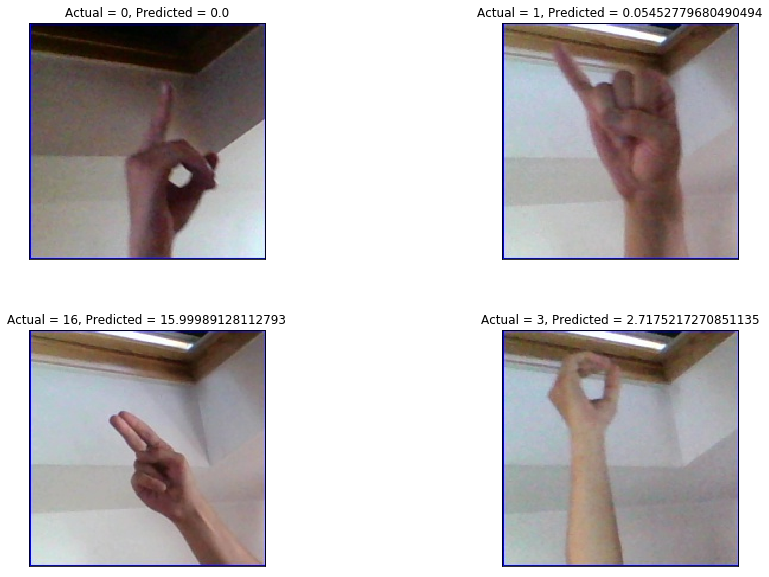

In [20]:
plt.figure(1 , figsize = (15, 10))
n = 0 

for i in range(4):
    n += 1 
    r = np.random.randint(0, x_test.shape[0], 1)
    
    plt.subplot(2, 2, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

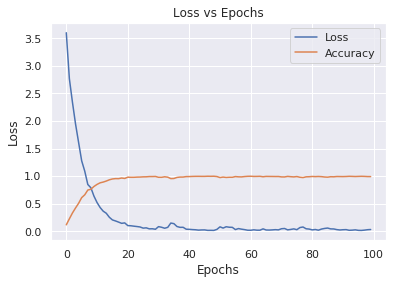

In [26]:
import seaborn as sns
sns.set()
plt.plot(history.history['loss'],label = 'Loss')
plt.plot(history.history['acc'],label = 'Accuracy')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
y = [list(l) for l in list(y)]
y_pred = [l.index(max(l)) for l in y]

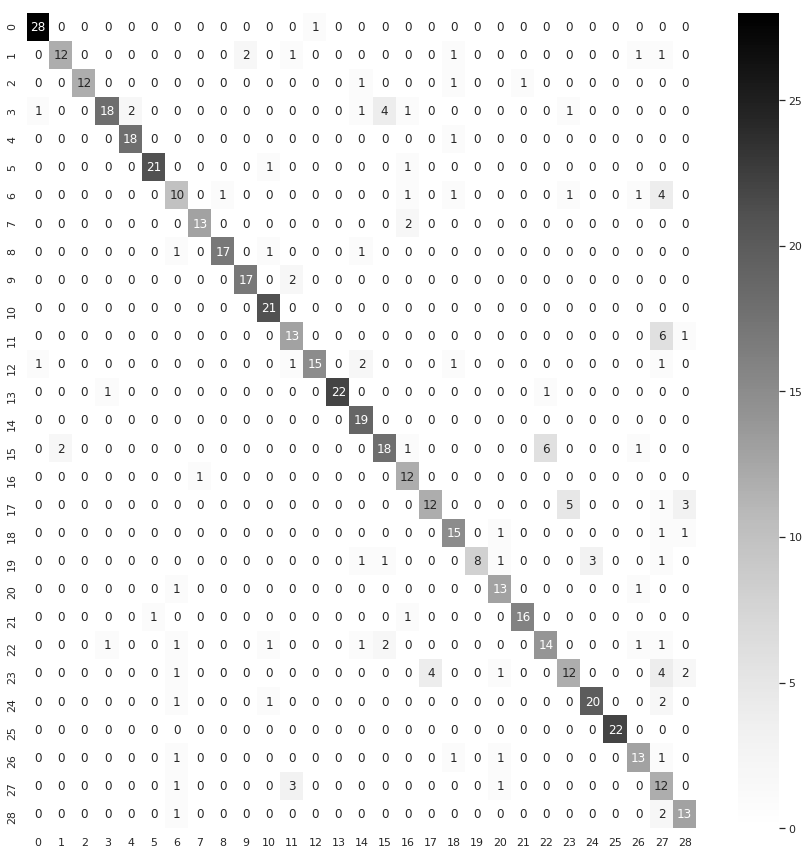

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score
plt.figure(1,figsize = (15,15))
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
sns.heatmap(cm,cmap = 'Greys',annot = True)

In [75]:
s = []*29
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i == j:
            s.append(cm[i][j])